In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, LineString, Polygon, MultiPolygon


In [3]:
#extraction des shapefiles
shp_arr = geopandas.read_file(
    'data\Arrondissements municipal/ARRONDISSEMENT_MUNICIPAL.shp')#arrondissements de Paris,Lyon et Marseille
shp_arr['INSEE_COM'] = shp_arr['INSEE_ARM']
shp_arr = shp_arr[['ID', 'NOM', 'NOM_M',
                             'INSEE_COM', 'geometry']]
shp_commune = geopandas.read_file('data\COMMUNE\COMMUNE.shp')#Communes de France
shp_commune = shp_commune[['ID', 'NOM', 'NOM_M', 'INSEE_COM', 'geometry']]
gdp = shp_commune.append(shp_arr)
gdp = gdp[(gdp.INSEE_COM != '75056') & (
    gdp.INSEE_COM != '69123') & (gdp.INSEE_COM != '13055')]
index = list(gdp['INSEE_COM'])
gdp = geopandas.GeoDataFrame(gdp).set_index('INSEE_COM').sort_index().reset_index()[['INSEE_COM','NOM','NOM_M','geometry']]
gdp


C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\920270690.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdp = shp_commune.append(shp_arr)


,INSEE_COM,NOM,NOM_M,geometry
0,01001,L'Abergement-Clémenciat,L'ABERGEMENT-CLEMENCIAT,"POLYGON ((851129.600 6563369.200, 851107.500 6..."
1,01002,L'Abergement-de-Varey,L'ABERGEMENT-DE-VAREY,"POLYGON ((888109.700 6545455.900, 888102.900 6..."
2,01004,Ambérieu-en-Bugey,AMBERIEU-EN-BUGEY,"POLYGON ((886593.000 6540886.000, 886567.900 6..."
3,01005,Ambérieux-en-Dombes,AMBERIEUX-EN-DOMBES,"POLYGON ((850413.200 6544061.000, 850381.800 6..."
4,01006,Ambléon,AMBLEON,"POLYGON ((899820.100 6520340.200, 899925.200 6..."
...,...,...,...,...
34853,95676,Villers-en-Arthies,VILLERS-EN-ARTHIES,"POLYGON ((608055.500 6889548.300, 608071.000 6..."
34854,95678,Villiers-Adam,VILLIERS-ADAM,"POLYGON ((646949.800 6886548.200, 646934.800 6..."
34855,95680,Villiers-le-Bel,VILLIERS-LE-BEL,"POLYGON ((656850.600 6880633.400, 656876.900 6..."
34856,95682,Villiers-le-Sec,VILLIERS-LE-SEC,"POLYGON ((655893.200 6887596.100, 655895.300 6..."


In [16]:
birth = pd.read_csv('data/base_naissances_2021.csv',
                    sep=';', index_col='CODGEO')#naissances depuis 2014
death = pd.read_csv('data/base_deces_2021.csv', sep=';', index_col='CODGEO')#morts depuis 2014
DEATHS = death.rename(columns={'DECESD14': '14', 'DECESD15': '15', 'DECESD16': '16', 'DECESD17': '17', 'DECESD18': '18', 'DECESD19': '19',
                          'DECESD20': '20', 'DECESD21': '21'})
BIRTHS = birth.rename(columns={'NAISD14': '14', 'NAISD15': '15', 'NAISD16': '16', 'NAISD17': '17', 'NAISD18': '18', 'NAISD19': '19',
                          'NAISD20': '20', 'NAISD21': '21'})
NETNAT = (BIRTHS-DEATHS).merge(gdp, how='right',
                             left_on='CODGEO', right_on='INSEE_COM')#NATURAL CHANGE
NETNAT['AVG'] = NETNAT[NETNAT.columns[0:8]].sum(axis = 1)
NETNAT

,14,15,16,17,18,19,20,21,INSEE_COM,NOM,NOM_M,geometry,AVG
0,1.0,8.0,3.0,6.0,1.0,-2.0,3.0,7.0,01001,L'Abergement-Clémenciat,L'ABERGEMENT-CLEMENCIAT,"POLYGON ((851129.600 6563369.200, 851107.500 6...",27.0
1,2.0,4.0,5.0,2.0,0.0,-2.0,1.0,-3.0,01002,L'Abergement-de-Varey,L'ABERGEMENT-DE-VAREY,"POLYGON ((888109.700 6545455.900, 888102.900 6...",9.0
2,125.0,101.0,95.0,82.0,108.0,62.0,87.0,83.0,01004,Ambérieu-en-Bugey,AMBERIEU-EN-BUGEY,"POLYGON ((886593.000 6540886.000, 886567.900 6...",743.0
3,8.0,8.0,11.0,7.0,9.0,19.0,7.0,32.0,01005,Ambérieux-en-Dombes,AMBERIEUX-EN-DOMBES,"POLYGON ((850413.200 6544061.000, 850381.800 6...",101.0
4,-1.0,0.0,2.0,0.0,-1.0,0.0,-1.0,1.0,01006,Ambléon,AMBLEON,"POLYGON ((899820.100 6520340.200, 899925.200 6...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34853,4.0,3.0,6.0,3.0,1.0,5.0,-2.0,4.0,95676,Villers-en-Arthies,VILLERS-EN-ARTHIES,"POLYGON ((608055.500 6889548.300, 608071.000 6...",24.0
34854,0.0,-4.0,-4.0,3.0,1.0,-3.0,1.0,6.0,95678,Villiers-Adam,VILLIERS-ADAM,"POLYGON ((646949.800 6886548.200, 646934.800 6...",0.0
34855,504.0,506.0,441.0,515.0,458.0,463.0,413.0,404.0,95680,Villiers-le-Bel,VILLIERS-LE-BEL,"POLYGON ((656850.600 6880633.400, 656876.900 6...",3704.0
34856,2.0,5.0,4.0,3.0,4.0,2.0,4.0,2.0,95682,Villiers-le-Sec,VILLIERS-LE-SEC,"POLYGON ((655893.200 6887596.100, 655895.300 6...",26.0


In [17]:
def extract_NETMOB(path,year,sep=';'):
    '''Fonction qui prend le chemin d'une dataframe et en extrait
    la mobilité résidentielle nette de l'année year'''
    df = pd.read_csv(path,sep=sep)#lecture du fichier
    
    
    df['CODGEO'] = df['CODGEO'].astype(str)#conversion de tout en str pour que ça soit comode
    L = list(df['CODGEO'].unique())
    df['DCRAN'] = df['DCRAN'].astype(str)
    df = df[(df.DCRAN != '99999') & (
    df.DCRAN != df.CODGEO)].reset_index(drop=True)#Que les mobilités résidentielles + ne pas compter ceux qui sont restés
    
    arrivants = df.groupby('CODGEO').sum()#Nombre d'arrivants dans chaque commune
    arrivants['Ca'] = arrivants.index.values
    
    depart = df.groupby('DCRAN').sum()#Nombre de départs dans chaque commune
    depart['Cd'] = depart.index.values
    
    
    data = arrivants.merge(depart, how='outer', left_on='Ca', right_on='Cd') #On merge les deux, ça fait plein de Nan
    #résolution du problème
    la = list(data['Ca'])
    nan = (la[-1])
    ld = list(data['Cd'])
    L = []
    n = len(la)
    for k in range(n):
        if la[k] != nan:
            L.append(ld[k])
        else:
            L.append(la[k])
    data['COM'] = L
    #Fin résolution du problème
    

    data = data[['NBFLUX_C'+year+'_POP01P_x', 'NBFLUX_C'+year+'_POP01P_y', 'COM']]
    data.rename(columns={'NBFLUX_C'+year+'_POP01P_y': 'INMOB'}, inplace=True)#Restructuration pour y voir clair
    data.rename(columns={'NBFLUX_C'+year+'_POP01P_x': 'OUTMOB'}, inplace=True)
    
    
    data = data.fillna(0)
    data['NETMOB'] = data['INMOB'] - data['OUTMOB']
    data3 = data.merge(gdp, how='right', left_on='COM', right_on='INSEE_COM')
    data3['NETMOB'] = data3['NETMOB'].fillna(0)#Là où il s'est rien passé, on met 0
    return data3[['COM','NETMOB']]


NETMOB = pd.DataFrame(list(gdp['INSEE_COM']),columns=['CODGEO'])
NETMOB['19'] = extract_NETMOB('data\Base-flux-mobilite-residentielle-2019.csv','19')['NETMOB']
NETMOB['18'] = extract_NETMOB('data\Base-flux-mobilite-residentielle-2018.csv','18')['NETMOB']
NETMOB['17'] = extract_NETMOB('data\Base-flux-mobilite-residentielle-2017.csv','17')['NETMOB']
NETMOB['16'] = extract_NETMOB('data\Base-texte-flux-mobilite-residentielle-2016.csv','16',sep=',')['NETMOB']
NETMOB['15'] = extract_NETMOB('data\Base-texte-flux-mobilite-residentielle-2015.csv','15',sep=',')['NETMOB']
NETMOB['14'] = extract_NETMOB('data\Base-texte-flux-mobilite-residentielle-2014.csv','14',sep=',')['NETMOB']
NETMOB['AVG'] = NETMOB[NETMOB.columns[3:]].sum(axis = 1)
NETMOB


C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\2589474576.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,sep=sep)#lecture du fichier
C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\2589474576.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arrivants = df.groupby('CODGEO').sum()#Nombre d'arrivants dans chaque commune
C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\2589474576.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  depart = df.groupby('DCRAN').sum()#Nombre de départs dans chaque commune
C:\Users\scapp\App

,CODGEO,19,18,17,16,15,14,AVG
0,01001,-3.255833,-3.455731,-4.020663,-10.444683,-8.936528,-7.662535,-31.064409
1,01002,3.667185,3.491188,6.896560,-2.813291,9.332759,9.649509,23.065537
2,01004,-13.714999,-18.848049,-4.222022,-97.034028,-119.837136,18.957003,-202.136183
3,01005,10.107840,13.307272,114.537056,89.496172,92.995766,48.307486,345.336480
4,01006,-4.920940,-5.035275,-5.032773,-5.000000,-4.957853,-5.006614,-19.997241
...,...,...,...,...,...,...,...,...
34853,95676,29.575433,28.196243,28.024594,36.878488,37.575687,29.980505,132.459274
34854,95678,-12.132058,-12.183988,-49.729430,-44.354084,-41.236191,-53.549930,-188.869634
34855,95680,539.294564,834.426833,774.896587,728.124035,690.555996,620.013964,2813.590582
34856,95682,-5.914197,-5.636636,-4.412171,4.989460,10.625312,14.754102,25.956703


In [18]:
def extract_INMIG(path,year,sep=';'):
    '''Fonction qui prend le chemin d'une dataframe et en extrait
    la mobilité étrangère sortante de l'année year'''
    df = pd.read_csv(path, sep=sep)#dataframe d'où extraire l'information
    df['CODGEO'] = df['CODGEO'].astype(str)#conversion en str pour éviter les merdes

    df = df[df.DCRAN == '99999'].rename(columns={'NBFLUX_C'+year+'_POP01P':'INMIG'})[['CODGEO','INMIG']]

    data = df.merge(gdp,how='right',left_on = 'CODGEO',right_on = 'INSEE_COM')[['NOM','INSEE_COM','INMIG']]
    data['INMIG']=data['INMIG'].fillna(0.)
    return data

INMIG = pd.DataFrame(list(gdp['INSEE_COM']),columns=['CODGEO'])
INMIG['19'] = extract_INMIG('data\Base-flux-mobilite-residentielle-2019.csv','19')['INMIG']
INMIG['18'] = extract_INMIG('data\Base-flux-mobilite-residentielle-2018.csv','18')['INMIG']
INMIG['17'] = extract_INMIG('data\Base-flux-mobilite-residentielle-2017.csv','17')['INMIG']
INMIG['16'] = extract_INMIG('data\Base-texte-flux-mobilite-residentielle-2016.csv','16',sep=',')['INMIG']
INMIG['15'] = extract_INMIG('data\Base-texte-flux-mobilite-residentielle-2015.csv','15',sep=',')['INMIG']
INMIG['14'] = extract_INMIG('data\Base-texte-flux-mobilite-residentielle-2014.csv','14',sep=',')['INMIG']
INMIG['AVG'] = INMIG[INMIG.columns[3:]].sum(axis = 1)
INMIG

C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\591299890.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)#dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\591299890.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)#dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\591299890.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)#dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\591299890.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)#dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Temp\ipykernel_1014

,CODGEO,19,18,17,16,15,14,AVG
0,01001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,01002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,01004,54.397650,56.082067,45.019538,72.050091,58.624688,65.962344,241.656661
3,01005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,01006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
34853,95676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34854,95678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34855,95680,82.891311,82.882064,89.113690,70.085212,59.319872,60.384540,278.903313
34856,95682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
POPINC2013 = pd.read_excel('data\pop-sexe-age-quinquennal6819.xls',skiprows = 12,sheet_name='COM_2013').iloc[1:].reset_index(drop=True)
POPINC2019 = pd.read_excel('data\pop-sexe-age-quinquennal6819.xls',skiprows = 12,sheet_name='COM_2019').iloc[1:].reset_index(drop=True)
#print(len(POPINC2019.columns))
POPINC2013['POP'] = POPINC2013[POPINC2013.columns[6:46]].sum(axis = 1)
POPINC2019['POP'] = POPINC2019[POPINC2019.columns[6:46]].sum(axis = 1)

POPINC2013=POPINC2013.rename(columns ={POPINC2013.columns[1]:'DEP',POPINC2013.columns[2]:'COM'})
POPINC2013['CODGEO']=POPINC2013['DEP']+POPINC2013['COM']

POPINC2019=POPINC2019.rename(columns ={POPINC2019.columns[1]:'DEP',POPINC2019.columns[2]:'COM'})
POPINC2019['CODGEO']=POPINC2019['DEP']+POPINC2019['COM']

POPI = POPINC2013[['CODGEO','Libellé de commune','POP']]
POPF = POPINC2019[['CODGEO','Libellé de commune','POP']]
POPINC = POPF[['CODGEO','Libellé de commune']]
POPINC['POPINC'] = POPF['POP'] - POPI['POP']
POPINC = POPINC.merge(gdp,left_on='CODGEO',right_on = 'INSEE_COM',how = 'right')[['CODGEO','NOM','POPINC']]
POPINC

,CODGEO,NOM,POPINC
0,01001,L'Abergement-Clémenciat,11.005715
1,01002,L'Abergement-de-Varey,37.037395
2,01004,Ambérieu-en-Bugey,-214.008756
3,01005,Ambérieux-en-Dombes,138.271976
4,01006,Ambléon,6.623377
...,...,...,...
34853,95676,Villers-en-Arthies,6.803181
34854,95678,Villiers-Adam,25.939225
34855,95680,Villiers-le-Bel,1128.329169
34856,95682,Villiers-le-Sec,1.672316


In [25]:

#création de la dataframe avec les composantes
VARPOP = pd.DataFrame(list(gdp['INSEE_COM']),columns=['CODGEO'])
VARPOP['NETNAT'] = NETNAT['AVG']#Natalité nette
VARPOP['NETMOB'] = NETMOB['AVG']#Mobilité interne nette
VARPOP['INMIG'] = INMIG['AVG']#Immigration internationale
VARPOP['POPINC'] = POPINC['POPINC']#Variation de population
VARPOP['NETMIG'] = VARPOP['POPINC'] - VARPOP['NETNAT'] -VARPOP['NETMOB']#Migration internationale nette

"""
POPINC = NETNAT + NETMOB + NETMIG
NETMIG = POPINC - NETNAT - NETMOB

"""
VARPOP = VARPOP[['CODGEO','NETNAT','NETMIG','NETMOB','POPINC']]
VARPOP

,CODGEO,NETNAT,NETMIG,NETMOB,POPINC
0,01001,27.0,15.070124,-31.064409,11.005715
1,01002,9.0,4.971859,23.065537,37.037395
2,01004,743.0,-754.872573,-202.136183,-214.008756
3,01005,101.0,-308.064504,345.336480,138.271976
4,01006,0.0,26.620617,-19.997241,6.623377
...,...,...,...,...,...
34853,95676,24.0,-149.656093,132.459274,6.803181
34854,95678,0.0,214.808859,-188.869634,25.939225
34855,95680,3704.0,-5389.261413,2813.590582,1128.329169
34856,95682,26.0,-50.284387,25.956703,1.672316


In [26]:
#Création de colonnes pour la visualisation
VARPOP['CAUSE'] = np.abs(VARPOP[['NETNAT','NETMOB','NETMIG']]).idxmax(axis = 1) #maximum des valeurs absolues des composantes
signe = lambda x : (x>0) + (x<0)*(-1)
VARPOP['SGN'] = signe(VARPOP['POPINC'])#Si la population a augmenté ou baissé




VARPOP['C'] = np.arange(len(VARPOP))
#VARPOP[(VARPOP.SGN == -1) & (VARPOP.CAUSE == 'NETMOB')]['C'] = 'NETMOB -'
for index in range(len(VARPOP)):
    if VARPOP['SGN'][index] == -1:
        if VARPOP['CAUSE'][index] == 'NETMOB':
            VARPOP['C'][index] = 'NETMOB -'
        elif VARPOP['CAUSE'][index] == 'NETNAT':
              VARPOP['C'][index] = 'NETNAT -'
        else:
            VARPOP['C'][index] = 'NETMIG -'
    else:
        if VARPOP['CAUSE'][index] == 'NETMOB':
            VARPOP['C'][index] = 'NETMOB +'
        elif VARPOP['CAUSE'][index] == 'NETNAT':
              VARPOP['C'][index] = 'NETNAT +'
        else:
            VARPOP['C'][index] ='INMIG +'
VARPOP

C:\Users\scapp\AppData\Local\Temp\ipykernel_10148\104475376.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VARPOP['C'][index] = 'NETMOB +'


,CODGEO,NETNAT,NETMIG,NETMOB,POPINC,CAUSE,SGN,C
0,01001,27.0,15.070124,-31.064409,11.005715,NETMOB,1,NETMOB +
1,01002,9.0,4.971859,23.065537,37.037395,NETMOB,1,NETMOB +
2,01004,743.0,-754.872573,-202.136183,-214.008756,NETMIG,-1,NETMIG -
3,01005,101.0,-308.064504,345.336480,138.271976,NETMOB,1,NETMOB +
4,01006,0.0,26.620617,-19.997241,6.623377,NETMIG,1,INMIG +
...,...,...,...,...,...,...,...,...
34853,95676,24.0,-149.656093,132.459274,6.803181,NETMIG,1,INMIG +
34854,95678,0.0,214.808859,-188.869634,25.939225,NETMIG,1,INMIG +
34855,95680,3704.0,-5389.261413,2813.590582,1128.329169,NETMIG,1,INMIG +
34856,95682,26.0,-50.284387,25.956703,1.672316,NETMIG,1,INMIG +


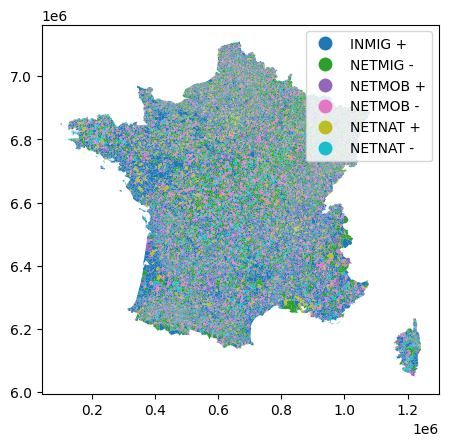

In [27]:
data = geopandas.GeoDataFrame(VARPOP.merge(gdp,how = 'right',left_on = 'CODGEO',right_on = 'INSEE_COM'),geometry = 'geometry')
data.plot('C',legend = True)
plt.show()